<a href="https://colab.research.google.com/github/SMJ2003-pocketware/OPTIMIZATION-MODEL/blob/main/Task_4_Optimization_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the required libraries and dependencies**

In [1]:
!pip install pulp

In [2]:
import pulp
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Defining the problem
prob = pulp.LpProblem("Production_Optimization", pulp.LpMaximize)

In [4]:
#Define decision variables
x1 = pulp.LpVariable("Product_A", lowBound=0, cat='Continuous')
x2 = pulp.LpVariable("Product_B", lowBound=0, cat='Continuous')

In [5]:
#Maximizing profit
prob += 40 * x1 + 30 * x2, "Total_Profit"

In [6]:
#Constraints
prob += 2 * x1 + 1 * x2 <= 100, "Material_Availability"
prob += 1 * x1 + 2 * x2 <= 80, "Labor_Availability"

In [8]:
!apt-get install -y glpk-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
Suggested packages:
  libiodbc2-dev
The following NEW packages will be installed:
  glpk-utils libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
0 upgraded, 5 newly installed, 0 to remove and 20 not upgraded.
Need to get 625 kB of archives.
After this operation, 2,158 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsuitesparseconfig5 amd64 1:5.10.1+dfsg-4build1 [10.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libamd2 amd64 1:5.10.1+dfsg-4build1 [21.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libcolamd2 amd64 1:5.10.1+dfsg-4build1 [18.0 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libglpk40 amd64 5.0-1 [361 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 glpk-ut

In [9]:
#Solving the problem
prob.solve(pulp.GLPK_CMD())

1

In [10]:
#Printing results
print("Optimal Production Plan:")
for variable in prob.variables():
    print(f"{variable.name} = {variable.varValue}")

print(f"Total Profit: ${pulp.value(prob.objective)}")


Optimal Production Plan:
Product_A = 40.0
Product_B = 20.0
Total Profit: $2200.0


In [11]:
#Insights
if prob.status == 1:
    print("Solution is optimal.")
elif prob.status == -1:
    print("Problem is infeasible.")
else:
    print("Solution status unknown.")

Solution is optimal.


In [12]:
#Sensitivity Analysis
print("\nSensitivity Analysis:")
for name, constraint in prob.constraints.items():
    print(f"{name}: Shadow Price = {constraint.pi}, Slack = {constraint.slack}")



Sensitivity Analysis:
Material_Availability: Shadow Price = None, Slack = None
Labor_Availability: Shadow Price = None, Slack = None


**Visualization**

In [13]:
x = np.linspace(0, 60, 100)
y1 = (100 - 2 * x) / 1
y2 = (80 - 1 * x) / 2

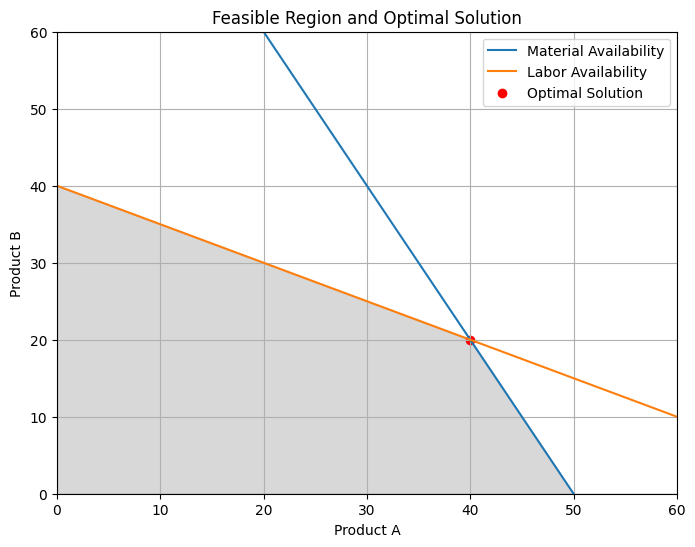

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label="Material Availability")
plt.plot(x, y2, label="Labor Availability")
plt.fill_between(x, np.minimum(y1, y2), alpha=0.3, color='gray')
plt.scatter([x1.varValue], [x2.varValue], color='red', marker='o', label='Optimal Solution')
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xlabel("Product A")
plt.ylabel("Product B")
plt.legend()
plt.title("Feasible Region and Optimal Solution")
plt.grid()
plt.show()